# Lab2: CNN Visualization
by Lawrence (Jake) Klinkert and Hongjin (Tony) Yu

Submission Details: Turn in the rendered jupyter notebook (exported as HTML) to canvas. Only one notebook per team is required, but team names must be on the assignment. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from IPython.display import Image, display
from PIL import Image as PIL_Image
from keras import backend as K
from tensorflow import keras
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions
from tensorflow.keras import layers

In this lab you will find and analyze a circuit in a common neural network.  A reference figure is also shown to help clarify the process of finding and analyzing deep circuits. https://ai.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html

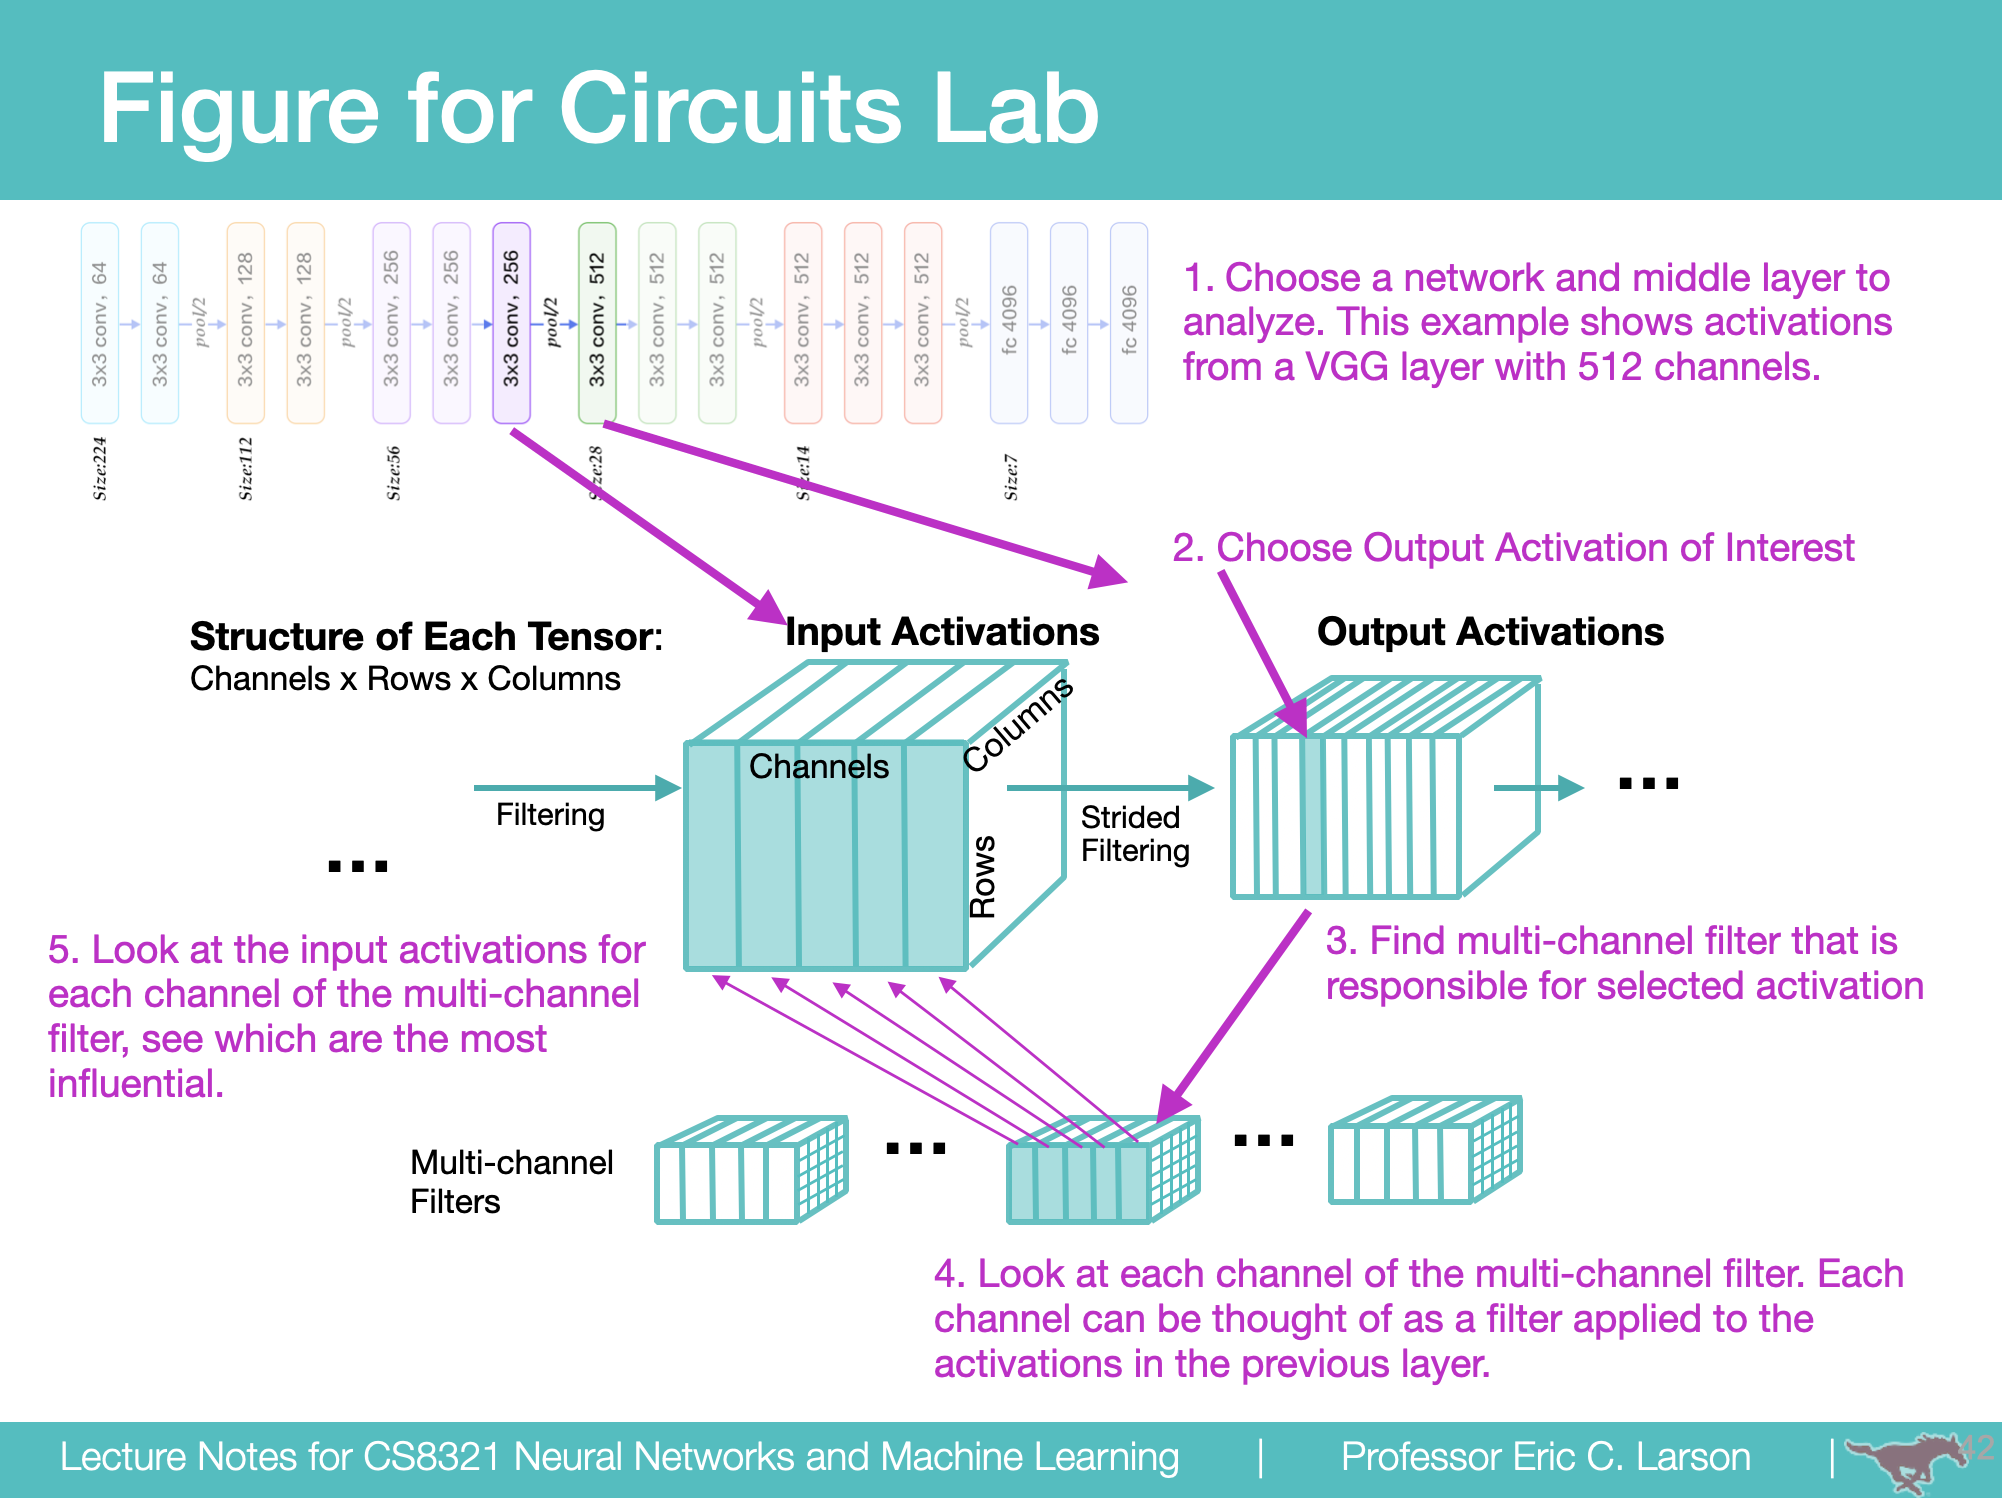

In [5]:
PIL_Image.open("Data/CircuitsFigure.png")

## 1. Model Selection and Task

[3 Points] In groups, you should select a convolutional neural network model that has been pre-trained on a large dataset (preferably, ImageNet). These already trained models are readily available online through many mechanisms, including the keras.application package (Inception, Xception, VGG etc.) https://keras.io/api/applications/Links to an external site. Simplicity in architecture is helpful (such as VGG or other network with relatively few layers and without complex feed forward operations in the overall flow). 

Explain the model you chose and why.  Classify a few images with pre-trained network to verify that it is working properly.

We've choosen the VGG19 model, a pre-trianed convolutional neural network created by Simonyan and Zisserman from Visual Geometry Group (VGG) at University of Oxford in 2014. Trained on ImageNet ILSVRC data set of 1000 image classes. We choose this model because we wish to learn more about it's simplistic design, as well as it's reputation within the Machine Learning and Computer Vision compunity.

As a fun experiment, we would like to determine if a circuit can be excited on an image classification that the model has not been trained for. In particular, we would like to see if images of Ghost orbs can be classified. We hypothesis that the model will try to classify objects in the background of the image. However, if the classifer can detect classifications such as light or ball, such as soccer ball, balloon, croquet ball, golf ball, baseball, ping-pong ball, volleyball, then we can conclude that the model is detecting the ghost orb.

### 1.1 Model Overview

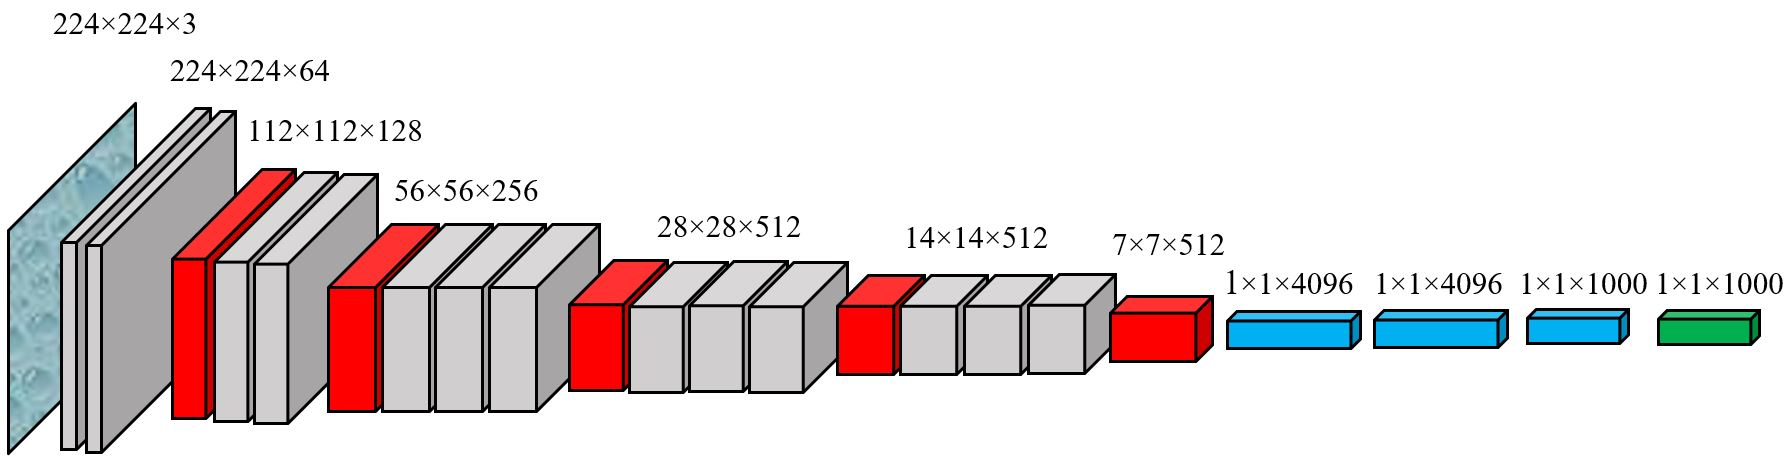

In [6]:
PIL_Image.open("Data/VGG_structure.jpg")

In [7]:
model = VGG19(weights='imagenet', include_top=True)
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### 1.2 Test Images of Normal Classification

In [8]:
# Code based on Francois Chollet book, "Deep learning with python"
def get_img_array(img_path, target_size):
    img = keras.utils.load_img(
        img_path, target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

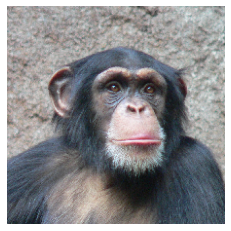

Predicted: [('n02481823', 'chimpanzee', 0.9766608), ('n02487347', 'macaque', 0.008494063), ('n02484975', 'guenon', 0.0052825105)]


In [9]:
# Get Image from website
img_path = keras.utils.get_file(
    fname="monkey.jpg",
    origin="https://upload.wikimedia.org/wikipedia/commons/8/87/Chimpanzee-Head.jpg")

# Transform Image to tensor 
img_tensor = get_img_array(img_path, target_size=(224, 224))

plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

x = preprocess_input(img_tensor)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

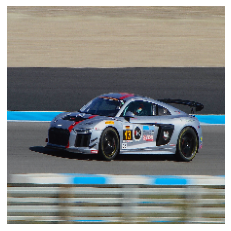

Predicted: [('n04037443', 'racer', 0.92268586), ('n04285008', 'sports_car', 0.07560675), ('n02974003', 'car_wheel', 0.000850844)]


In [10]:
# Get Image from website
img_path = keras.utils.get_file(
    fname="racecar.jpg",
    origin="https://media.wired.com/photos/5bb7b096ffac9b2ce1d57958/master/pass/Racecar.jpg")

# Transform Image to tensor 
img_tensor = get_img_array(img_path, target_size=(224, 224))

plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

x = preprocess_input(img_tensor)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

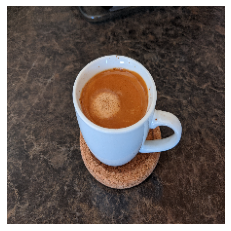

Predicted: [('n07920052', 'espresso', 0.9125651), ('n07930864', 'cup', 0.053587493), ('n03063599', 'coffee_mug', 0.016656896)]


In [11]:
# Get Image from website
img_path = keras.utils.get_file(
    fname="coffee.jpg",
    origin="https://upload.wikimedia.org/wikipedia/commons/a/a9/Espresso_shot.jpg")

# Transform Image to tensor 
img_tensor = get_img_array(img_path, target_size=(224, 224))

plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

x = preprocess_input(img_tensor)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

### 1.3 Target Image Classification

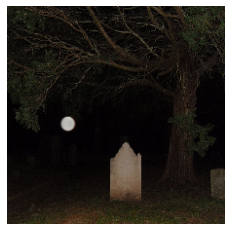

Predicted: [('n03743016', 'megalith', 0.49285123), ('n04523525', 'vault', 0.04448068), ('n04532670', 'viaduct', 0.037911825)]


In [12]:
# Get Image from website
img_path = keras.utils.get_file(
    fname="ghost_orb_1.jpg",
    origin="https://res.cloudinary.com/miles-extranet-dev/image/upload/v1521832821/Georgia/migration_photos/36981/SAM_6187.jpg")

# Transform Image to tensor 
img_tensor = get_img_array(img_path, target_size=(224, 224))

plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

x = preprocess_input(img_tensor)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

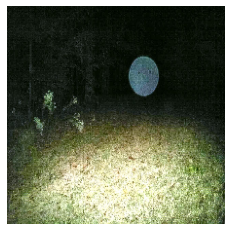

Predicted: [('n04409515', 'tennis_ball', 0.7556503), ('n07802026', 'hay', 0.049199454), ('n03445777', 'golf_ball', 0.024642898)]


In [13]:
# Get Image from website
img_path = keras.utils.get_file(
    fname="ghost_orb_3.jpg",
    origin="https://i.pinimg.com/originals/36/a0/1b/36a01bc7053faeaccbaa8cccb9d98c81.jpg")

# Transform Image to tensor 
img_tensor = get_img_array(img_path, target_size=(224, 224))

plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

x = preprocess_input(img_tensor)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

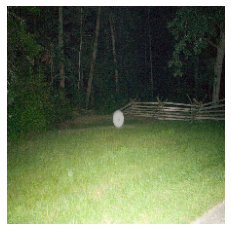

Predicted: [('n03445777', 'golf_ball', 0.2416542), ('n03134739', 'croquet_ball', 0.1853831), ('n04254680', 'soccer_ball', 0.07045565)]


In [14]:
# Get Image from website
img_path = keras.utils.get_file(
    fname="ghost_orb_4.jpg",
    origin="https://live.staticflickr.com/2489/3927077693_414b86d8a0_b.jpg")

# Transform Image to tensor 
img_tensor = get_img_array(img_path, target_size=(224, 224))

plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

x = preprocess_input(img_tensor)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

[4 Points] Select a multi-channel filter (i.e., a feature) in a layer in which to analyze as part of a circuit. This should be a multi-channel filter in a "mid-level" portion of the network (that is, there are a few convolutional layers before and after this chosen layer). You might find using OpenAI microscope a helpful tool for selecting a filter to analyze without writing too much code: https://microscope.openai.com/models/

The channel that best works with our target classification is In VGG 19, conv3_3, unit 195 (https://microscope.openai.com/models/vgg19_caffe/conv3_3_conv3_3_0/195)

Using image gradient techniques, find an input image that maximally excites this chosen multi-channel filter. General techniques are available from f. Chollet: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter09_part03_interpreting-what-convnets-learn.ipynbLinks to an external site.

In [28]:
#Code based on Francois Chollet's blog post (https://keras.io/examples/vision/visualizing_what_convnets_learn/)

img_width = 224
img_height = 224

# Based on OpenAI Miecroscope, the layer that is most interesting to us is conv3_3/conv3_3 unit 195
layer_name = "block3_conv3"

# Build a VGG19 model loaded with pre-trained ImageNet weights
# Need to set include_top to False, since we are no longer predicting images
model = VGG19(weights='imagenet', include_top=False)

# Set VGG19 model to return the activation values of our layer
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.inputs, outputs=layer.output)

In [29]:
def compute_loss(input_image, filter_index):
    # get the activation values for our target layer
    activation = feature_extractor(input_image)

    # We avoid border artifacts by only involving non-border pixels in the loss.
    filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    return tf.reduce_mean(filter_activation)

@tf.function
def gradient_ascent_step(img, filter_index, learning_rate):
    # Gradient tap bookkeeps the changes of an input. Given an image, we want to determine the 
    # loss produced by the image and the specific filter from the network
    with tf.GradientTape() as tape:
        tape.watch(img)
        loss = compute_loss(img, filter_index)
    # Compute gradients.
    grads = tape.gradient(loss, img)
    # Normalize gradients.
    grads = tf.math.l2_normalize(grads)
    img += learning_rate * grads
    return loss, img

def initialize_image(img_w, img_h):
    img = tf.random.uniform((1, img_w, img_h, 3))
    return (img - 0.5) * 0.25


def visualize_filter(filter_index, img_w, img_h):
    #Given an image with random pixle values, can we iterate over the image and iterested filter
    #such that each iteration increases the pixle values of the image based on the activation of interesed filter 
    iterations = 30
    learning_rate = 10.0
    img = initialize_image(img_w, img_h)
    for iteration in range(iterations):
        loss, img = gradient_ascent_step(img, filter_index, learning_rate)

    # transfrom the final image into a visual picture
    img = deprocess_image(img[0].numpy())
    return loss, img


def deprocess_image(img):
    # Normalize array
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.15

    # Center crop
    img = img[25:-25, 25:-25, :]

    # Clip to [0, 1]
    img += 0.5
    img = np.clip(img, 0, 1)

    # Convert to RGB array
    img *= 255
    img = np.clip(img, 0, 255).astype("uint8")
    return img

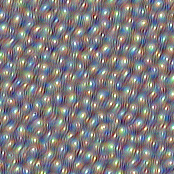

In [31]:
loss, img = visualize_filter(195, img_width, img_height)
keras.preprocessing.image.save_img("195.png", img)
display(Image("195.png"))

Give a hypothesis for what this multi-channel filter might be extracting. That is, what do you think its function is in the network? 

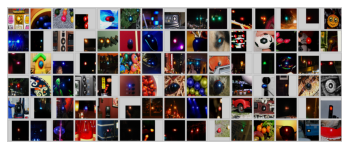

In [33]:
img_path = keras.utils.get_file(
    fname="unit_195.jpg",
    origin="https://i.ibb.co/Z6NgBGk/layer-195.png")

# Transform Image to tensor 
img_tensor = get_img_array(img_path, target_size=(526, 1306))

plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

According to OpenAI Microscope, VGG19 ath conv3_3, unit 195 these are the images activate this unit the most (https://microscope.openai.com/models/vgg19_caffe/conv3_3_conv3_3_0/195). The images look to be spherical and either have a glowing or bluring of the edges. This makes sense, because the filter has several circles with a bluring around each circle. Each circle also has a rainbow of diffrent colors, allowing for the circle itself to be diffrent colors. Other filters such as unit 8 and unit 11 focus on blue or red colors, respectively. This unit seems to allow any others, but must be a circular shape.

If using code from another source, you must heavily document the code so that I can grade your understanding of the code used. 

[4 Points] Analyze each channel of the multi-channel filter to this feature that might form a circuit. That is, visualize the convolutional filter (one channel) between the input activations and the current activation to understand which inputs make up a circuit. One method of doing this is given below:

Extract the filter coefficients for each input activation to that multi-channel filter. Note: If the multi-channel filter is 5x5 with an input channel size of 64, then this extraction will result in 64 different input filters, each of size 5x5. 

Keep the top six sets of inputs with the "strongest" weights. For now, you can use the L2 norm of each input filter as a measure of strength. Visualize these top six filters. 

For these six strongest input filters, categorize each as "mostly inhibitory" or "mostly excitatory." That is, does each filter consist of mostly negative or mostly positive coefficients?  

[4 Points] For each of the six input filters that are strongest, use image gradient techniques to visualize what each of these filters is most excited by (that is, what image maximally excites each of these filters?).

Use these visualizations, along with the circuit weights you just discovered to try and explain how this particular circuit works. An example of this visualization style can be seen here: https://storage.googleapis.com/distill-circuits/inceptionv1-weight-explorer/mixed3b_379.htmlLinks to an external site. 

Try to define the properties of this circuit using vocabulary from https://distill.pub/2020/circuits/zoom-in/Links to an external site. (such as determining if this is polysemantic, pose-invariant, etc.)  